In [12]:
import sys
import joblib
import pandas as pd
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

from config import PROCESSED_DIR, MODELS_DIR

caminho_raiz = Path.cwd().parent  
caminho_src = caminho_raiz / "src"  
caminho_scripts = caminho_src / "scripts"  

sys.path.append(str(caminho_scripts))  

from transformacao_dataset import executar_transformacoes
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
caminho_modelo = MODELS_DIR / "modelo_otimizado.joblib"
modelo = joblib.load(filename=caminho_modelo)

In [3]:
caminho_data = PROCESSED_DIR / "dataset_traduzido.csv"
data = pd.read_csv(caminho_data)

In [4]:
transformacoes_config = {
        "colunas_label": ['Sexo'], "colunas_binarias": ['AnginaExercicio'], "colunas_onehot": ['TipoDorTorax', 'EletrocardiogramaRepouso', 'InclinacaoST']
}

In [5]:
df = executar_transformacoes(data, colunas_binarias=transformacoes_config.get("colunas_binarias"), 
    colunas_label=transformacoes_config.get("colunas_label"), colunas_onehot=transformacoes_config.get("colunas_onehot"), salvar=False)

In [6]:
X = df.drop(columns=['DoencaCardiaca'], axis=1)
y = df['DoencaCardiaca']

In [9]:
predictions = modelo.predict(X)
predictions_proba = modelo.predict_proba(X)[:, 1]  

In [10]:
accuracy = accuracy_score(y, predictions)
precision = precision_score(y, predictions)
recall = recall_score(y, predictions)
f1 = f1_score(y, predictions)
roc_auc = roc_auc_score(y, predictions_proba)
conf_matrix = confusion_matrix(y, predictions)

In [11]:
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("Matriz de Confusão:")
print(conf_matrix)

Acurácia: 0.8715
Precisão: 0.8736
Recall (Sensibilidade): 0.8976
F1-Score: 0.8854
ROC-AUC: 0.9314
Matriz de Confusão:
[[344  66]
 [ 52 456]]


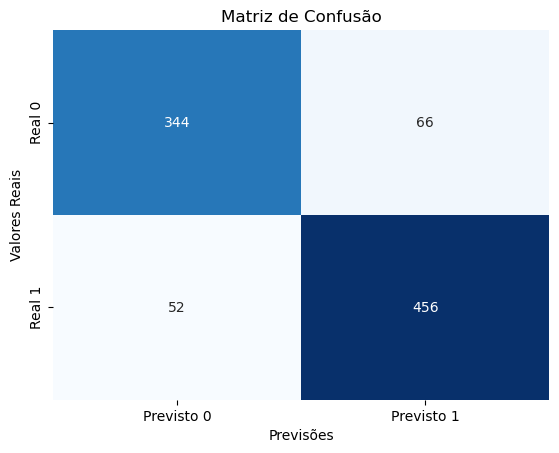

In [13]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Previsto 0', 'Previsto 1'], yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [14]:
comparison = pd.DataFrame({'Real': y, 'Previsto': predictions})

In [16]:
comparison.head(50)

,Real,Previsto
0,0,0
1,1,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0
